In [ ]:
#The following code will help us look over the endangered species in a National Park. We want to see the reasons why species are becoming endangered.
#The following questions are what I want to use the project to see.
# What species are endangered? \n Is there a correlation between the parks and the endangered species? \n What category of species are most endangered?

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#Read in the two csv files that give you information on the species in national parks and the sitings/observations
species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')


In [18]:
#use head to view the first few rows of each data set.
print(species_info.head())

print(species_info.describe())

species_names = species_info['common_names'].unique()

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4

In [8]:
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [9]:
print(species_info['conservation_status'].unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [29]:
#Created lists of different species based on their conservation status
species_of_concern = species_info.common_names[species_info['conservation_status'] == 'Species of Concern']
endangered_species = species_info.common_names[species_info['conservation_status'] == 'Endangered']
threatened_species = species_info.common_names[species_info['conservation_status'] == 'Threatened']
in_recovery_species = species_info.common_names[species_info['conservation_status'] == 'In Recovery']
normal_species = species_info.common_names[species_info['conservation_status'].isnull()]
print(endangered_species) 


8                                               Gray Wolf
9                                                Red Wolf
34                                            Gray Myotis
39                  Indiana Bat, Indiana Or Social Myotis
72      Carolina Northern Flying Squirrel, Northern Fl...
173                                        Whooping Crane
276             Bachman's Warbler, Bachman's Wood Warbler
343                               Red-Cockaded Woodpecker
540                                      Duskytail Darter
570                                          Smoky Madtom
2497                      Mountain Avens, Spreading Avens
3275                                          June Sucker
4446                          Sierra Nevada Bighorn Sheep
4448                                      Gray Wolf, Wolf
4505                                    California Condor
4601                     Sierra Nevada Yellow-Legged Frog
Name: common_names, dtype: object


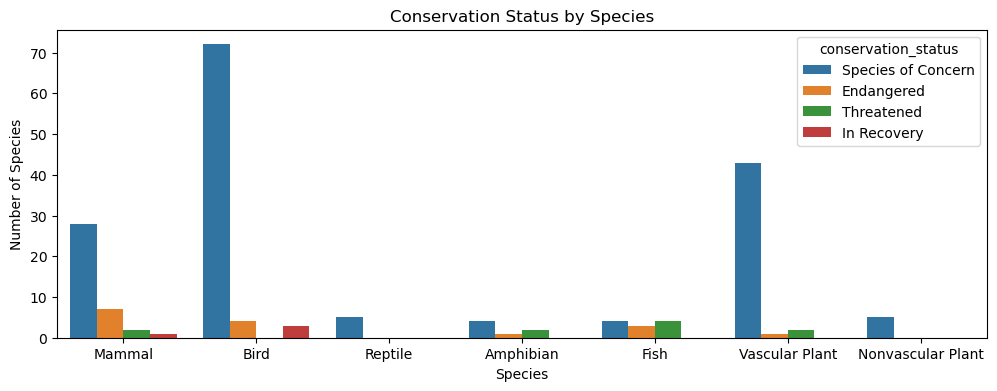

In [35]:
# create a bar chart that shows the amount of endangered species per category.
plt.figure(figsize = (12,4))
ax = sns.countplot(x = 'category', data = species_info, hue = 'conservation_status')
plt.title('Conservation Status by Species')
plt.xlabel('Species')
plt.ylabel('Number of Species')
plt.show()
plt.close()

In [ ]:
# The bird category holds the greatest amount of species of concern. While mammals holds the highest amount of endangered species. Fish is another 
# category that contains the highest threatened species. 

In [42]:
#combine the two datasets to allow more summary statistics
species_data_combined = pd.merge(species_info, observations)
print(species_data_combined.head())

  category                scientific_name              common_names  \
0   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
1   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
2   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
3   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
4   Mammal                      Bos bison     American Bison, Bison   

  conservation_status                            park_name  observations  
0                 NaN                  Bryce National Park           130  
1                 NaN            Yellowstone National Park           270  
2                 NaN  Great Smoky Mountains National Park            98  
3                 NaN               Yosemite National Park           117  
4                 NaN               Yosemite National Park           128  


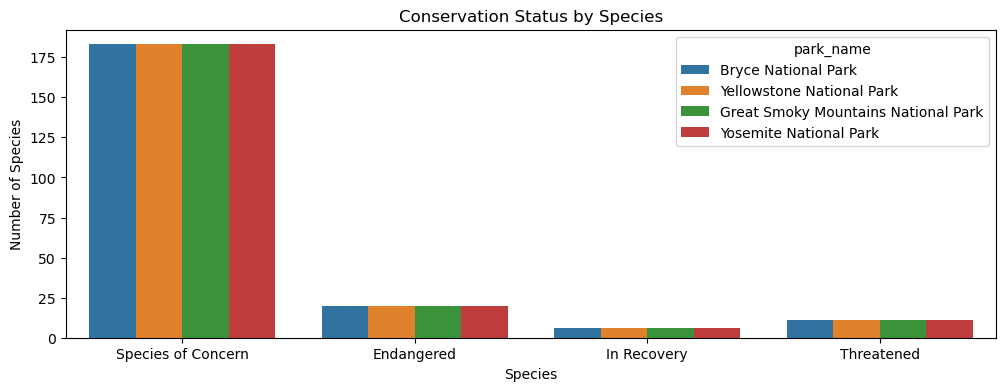

In [52]:
plt.figure(figsize = (12,4))
ax = sns.countplot(x = 'conservation_status', data = species_data_combined, hue = 'park_name')
plt.title('Conservation Status by Species')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.show()
plt.close()

In [ ]:
#from the data seen in the above bar chart we can safely say from the collected data, there is no correlation between parks and conservation status.
#Each park contains the same amount of species in each conservation status.

In [ ]:
#In conclusion, it is hard to say that there is any relationship between the parks and endangered species. Based on the collected data, 
#we have the same amount of species in each of the types of conservation status. 
#Like previously stated, we can note that out of all of the species, birds have the highest amount of species of concern and mammals are the most endangered